# What is a Neural Network?

Simply description of Neural Networks is a mathematical function that maps a gicen input.

NN consist of the following components

    - An input layer, x
    - An optional amount of hidden layers
    - An output layer, ŷ
    - A set of weigths(W) and biases(b) between each layer
    - A choice of activation function for each hidden layer, σ. (Sigmoid activation function is used in this code)

In [25]:
# -*- coding: UTF-8 -*-

'''
    ##################################################
    #                   Python 3.7                   #      
    # __author__ = İlkay Tevfik Devran   		     #   
    # __date__ = "02.01.2019"                        #
    # __updatedDate__ = "02.01.2019"                 #
    # __version__ = 1.0                              # 
    ##################################################
'''

import numpy as np

### Here is the architecture of NN

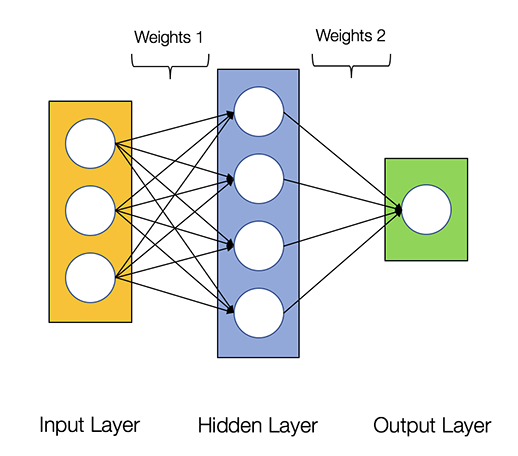

Let's create it!

In [33]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  
                            (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), 
                                    self.weights2.T) * sigmoid_derivative(self.layer1))
                           )

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    def predict(self, x):
        layer1 = sigmoid(np.dot(x, self.weights1))
        output = sigmoid(np.dot(layer1, self.weights2))
        return output

In [45]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)


if __name__ == "__main__":
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y)

    for i in range(1500):
        nn.feedforward()
        nn.backprop()

    print(nn.output , "\n\n")
    
    x_seen = np.array([1, 1, 0])
    print(nn.predict(x_seen))
    
    # [0.01162975]

    x_unseen = np.array([0, 1, 0])
    print(nn.predict(x_unseen))
    # [0.84968032]

[[0.00924297]
 [0.97254676]
 [0.97477593]
 [0.0302928 ]] 


[0.01619566]
[0.77711988]
